# Introduction

We previously calculated image transforms using low-resolution versions of all three modalities.  This script applies those transforms onto the high resolution versions, thus obtaining high-resolution registered images.

# Code initialization and utility functions

In [1]:
import SimpleITK as sitk

import numpy as np
import numpy.ma as ma

from myshow import myshow

import os
import sys
PolDir = "F:/Box Sync/Research/Polarimetry/Jupyter Analysis/Polscope_BasicCorrected/Large/"
MMPDir = "F:/Box Sync/Research/Polarimetry/Jupyter Analysis/MMP input/"
SHGDir = 'F:/Box Sync/Research/Polarimetry/Jupyter Analysis/SHG/'

OutDir = "F:/Box Sync/Research/Polarimetry/Jupyter Analysis/Reg Mask Output/Large/"

#module_path = os.path.abspath(os.path.join('C:/Users/mpinkert/Documents/GitHub/SimpleITK-Notebooks/Utilities/'))
#if module_path not in sys.path:
 #   sys.path.append(module_path)
    
#from downloaddata import fetch_data as fdata

# setup our plotting environment
import matplotlib.pyplot as plt
from matplotlib import gridspec


In [2]:
# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space. 
def display_images_with_alpha(alpha, fixed, moving):
    img = (1.0 - alpha)*fixed + alpha*moving 
    plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()

In [3]:
def resizeImage(itkImg, currentRes, targetRes):
    if targetRes > currentRes:
        scale = math.floor(targetRes/currentRes)
        endRes = currentRes*scale
        resampled = sitk.Shrink(itkImg,[scale,scale])
        resampled.SetSpacing([endRes, endRes])
    else:
        scale = math.floor(currentRes/targetRes)
        endRes = currentRes/scale
        resampled = sitk.Expand(itkImg,[scale,scale])
        resampled.SetSpacing([endRes,endRes])
    return resampled

# Resampling

In this section we will copy the transforms from other notebooks and apply them here.

## WP2

In [4]:
sample = 'WP2'

pol = sitk.ReadImage(PolDir + sample + '.tif', sitk.sitkFloat32)
pol.SetSpacing([0.677,0.677])

mmp = sitk.ReadImage(MMPDir + sample + '_MMP.tif', sitk.sitkFloat32)
mmp.SetSpacing([5.78,5.78])

shg = sitk.ReadImage(SHGDir + sample + '_SHG.tif', sitk.sitkFloat32)
shg.SetSpacing([0.619,0.619])

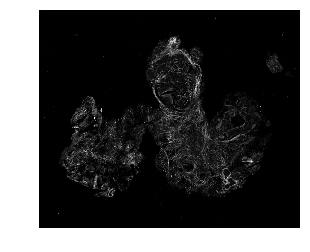

In [5]:
shgTransform = sitk.AffineTransform(2)

shgTransform.SetMatrix([1.0008, 0.000456954,
                     -0.00147489, 0.995622])
shgTransform.SetTranslation([-63.1734, -305.423])

shgReg = sitk.Resample(shg, pol, shgTransform, sitk.sitkLinear, 0.0, shg.GetPixelID())
display_images_with_alpha(0.7,pol, shgReg)

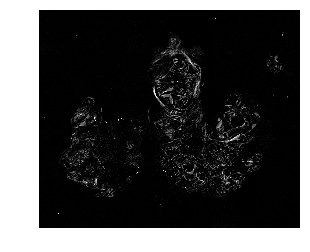

In [6]:
mmpTransform = sitk.AffineTransform(2)

mmpTransform.SetMatrix([0.999985, -0.0140515, 0.00580256, 0.99993])
mmpTransform.SetTranslation([-847.547, -568.725])

mmpReg = sitk.Resample(mmp, pol, mmpTransform, sitk.sitkLinear, 0.0, mmp.GetPixelID())
display_images_with_alpha(0.7,pol, mmpReg)

In [7]:
mask = mmpReg > 0;
maskPol = sitk.Mask(pol,mask)
maskSHG = sitk.Mask(shgReg,mask)

sitk.WriteImage(maskPol,os.path.join(OutDir,sample+'_Pol_RegLarge'+'.tif'))
sitk.WriteImage(maskSHG,os.path.join(OutDir,sample+'_SHG_RegLarge'+'.tif'))
sitk.WriteImage(mmpReg,os.path.join(OutDir,sample+'_MMP_RegLarge'+'.tif'))


## WP4

In [20]:
sample = 'WP4'

pol = sitk.ReadImage(PolDir + sample + '.tif', sitk.sitkFloat32)
pol.SetSpacing([0.677,0.677])

mmp = sitk.ReadImage(MMPDir + sample + '_MMP.tif', sitk.sitkFloat32)
mmp.SetSpacing([5.72,5.72])
mmp.SetOrigin([1000,652])

shg = sitk.ReadImage(SHGDir + sample + '_SHG.tif', sitk.sitkFloat32)
shg.SetSpacing([0.619,0.619])

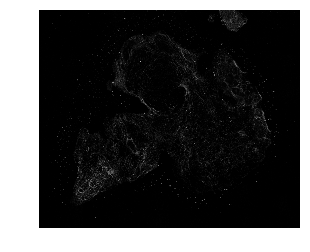

In [21]:
shgTransform = sitk.AffineTransform(2)

shgTransform.SetMatrix([1.00165, -0.008184, 0.00699441, 0.998889])
shgTransform.SetTranslation([-145.214, -33.646])

shgReg = sitk.Resample(shg, pol, shgTransform, sitk.sitkLinear, 0.0, shg.GetPixelID())
display_images_with_alpha(0.7,pol, shgReg)

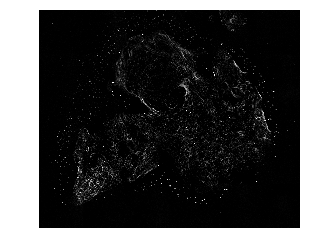

In [22]:
mmpTransform = sitk.AffineTransform(2)

mmpTransform.SetMatrix([0.99889, -0.0142492, 0.0145464, 0.993351])
mmpTransform.SetTranslation([28.5169, 56.7266])

mmpReg = sitk.Resample(mmp, pol, mmpTransform, sitk.sitkLinear, 0.0, mmp.GetPixelID())
display_images_with_alpha(0.7,pol, mmpReg)

In [23]:
mask = mmpReg > 0;
maskPol = sitk.Mask(pol,mask)
maskSHG = sitk.Mask(shgReg,mask)

sitk.WriteImage(maskPol,os.path.join(OutDir,sample+'_Pol_RegLarge'+'.tif'))
sitk.WriteImage(maskSHG,os.path.join(OutDir,sample+'_SHG_RegLarge'+'.tif'))
sitk.WriteImage(mmpReg,os.path.join(OutDir,sample+'_MMP_RegLarge'+'.tif'))


## WP5

In [24]:
sample = 'WP5'

pol = sitk.ReadImage(PolDir + sample + '.tif', sitk.sitkFloat32)
pol.SetSpacing([0.677,0.677])

mmp = sitk.ReadImage(MMPDir + sample + '_MMP.tif', sitk.sitkFloat32)
mmp.SetSpacing([5.78,5.78])
mmp.SetOrigin([2500,2000])

shg = sitk.ReadImage(SHGDir + sample + '_SHG.tif', sitk.sitkFloat32)
shg.SetSpacing([0.619,0.619])

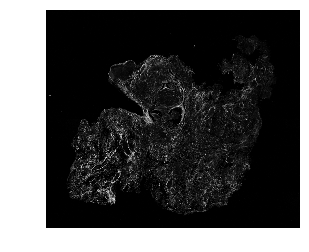

In [25]:
shgTransform = sitk.AffineTransform(2)

shgTransform.SetMatrix([1.01259, -0.0121501, -0.0158297, 0.954856])
shgTransform.SetTranslation([98.778, -546.223])

shgReg = sitk.Resample(shg, pol, shgTransform, sitk.sitkLinear, 0.0, shg.GetPixelID())
display_images_with_alpha(0.7,pol, shgReg)

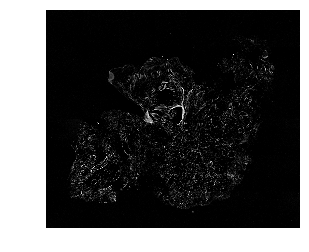

In [26]:
mmpTransform = sitk.AffineTransform(2)

mmpTransform.SetMatrix([0.992381, -0.045624, 0.0416502, 0.99018])
mmpTransform.SetTranslation([115.093, 251.917])

mmpReg = sitk.Resample(mmp, pol, mmpTransform, sitk.sitkLinear, 0.0, mmp.GetPixelID())
display_images_with_alpha(0.7,pol, mmpReg)

In [27]:
mask = mmpReg > 0;
maskPol = sitk.Mask(pol,mask)
maskSHG = sitk.Mask(shgReg,mask)

sitk.WriteImage(maskPol,os.path.join(OutDir,sample+'_Pol_RegLarge'+'.tif'))
sitk.WriteImage(maskSHG,os.path.join(OutDir,sample+'_SHG_RegLarge'+'.tif'))
sitk.WriteImage(mmpReg,os.path.join(OutDir,sample+'_MMP_RegLarge'+'.tif'))


## WP9

In [28]:
sample = 'WP9'

pol = sitk.ReadImage(PolDir + sample + '.tif', sitk.sitkFloat32)
pol.SetSpacing([0.677,0.677])

mmp = sitk.ReadImage(MMPDir + sample + '_MMP.tif', sitk.sitkFloat32)
mmp.SetSpacing([5.78,5.78])
mmp.SetOrigin([2600,2600])

shg = sitk.ReadImage(SHGDir + sample + '_SHG.tif', sitk.sitkFloat32)
shg.SetSpacing([0.619,0.619])

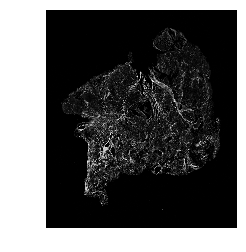

In [29]:
shgTransform = sitk.AffineTransform(2)

shgTransform.SetMatrix([0.997039, -0.0103974, 0.00929035, 0.997024])
shgTransform.SetTranslation([-321.488, -603.485])

shgReg = sitk.Resample(shg, pol, shgTransform, sitk.sitkLinear, 0.0, shg.GetPixelID())
display_images_with_alpha(0.7,pol, shgReg)

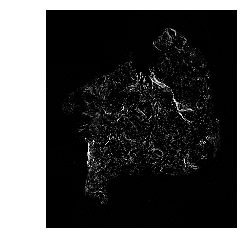

In [30]:
mmpTransform = sitk.AffineTransform(2)

mmpTransform.SetMatrix([1.004, -0.0305016, 0.030063, 1.00093])
mmpTransform.SetTranslation([36.5652, -78.7326])

mmpReg = sitk.Resample(mmp, pol, mmpTransform, sitk.sitkLinear, 0.0, mmp.GetPixelID())
display_images_with_alpha(0.7,pol, mmpReg)

In [31]:
mask = mmpReg > 0;
maskPol = sitk.Mask(pol,mask)
maskSHG = sitk.Mask(shgReg,mask)

sitk.WriteImage(maskPol,os.path.join(OutDir,sample+'_Pol_RegLarge'+'.tif'))
sitk.WriteImage(maskSHG,os.path.join(OutDir,sample+'_SHG_RegLarge'+'.tif'))
sitk.WriteImage(mmpReg,os.path.join(OutDir,sample+'_MMP_RegLarge'+'.tif'))
